# EDA

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:\\Users\\reddy\\OneDrive\\Documents\\loan prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier

In [2]:
! pip install -U scikit-learn
! python -m pip show scikit-learn  # to see which version and where scikit-learn is installed
! python -m pip freeze  # to see all packages installed in the active virtualenv
! python -c "import sklearn; sklearn.show_versions()"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0

### Reading Dataset

In [4]:
loan = pd.read_csv('madfhantr.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.shape

(614, 13)

In [6]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Column Info
* Loan_ID : Unique Loan ID
* Gender : Male/ Female
* Married : Applicant married (Y/N)
* Dependents : Number of dependents
* Education : Applicant Education (Graduate/ Under Graduate)
* Self_Employed : Self employed (Y/N)
* ApplicantIncome : Applicant income
* CoapplicantIncome : Coapplicant income
* LoanAmount : Loan amount in thousands
* Loan_Amount_Term : Term of loan in months
* Credit_History : credit history meets guidelines
* Property_Area : Urban/ Semi Urban/ Rural
* Loan_Status : Loan approved (Y/N)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Target Column
Our target column is 'Loan_Status', i.e Loan approved : Y(yes) / N(no)

In [8]:
loan['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

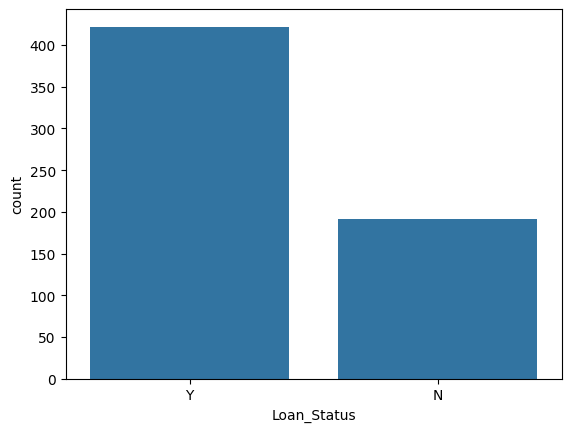

In [9]:
sns.countplot(x='Loan_Status', data=loan)

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

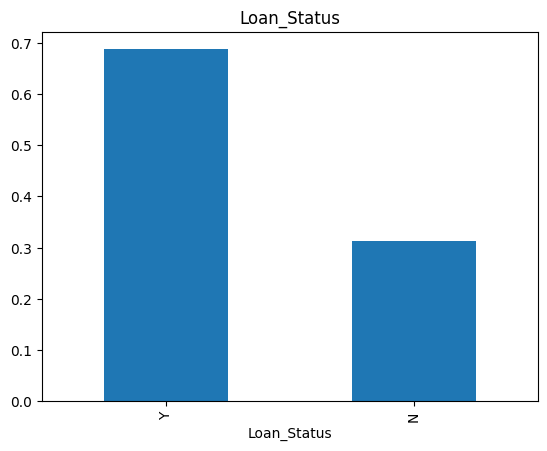

In [10]:
loan['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan_Status')

#### Independent Variable (Categorical)

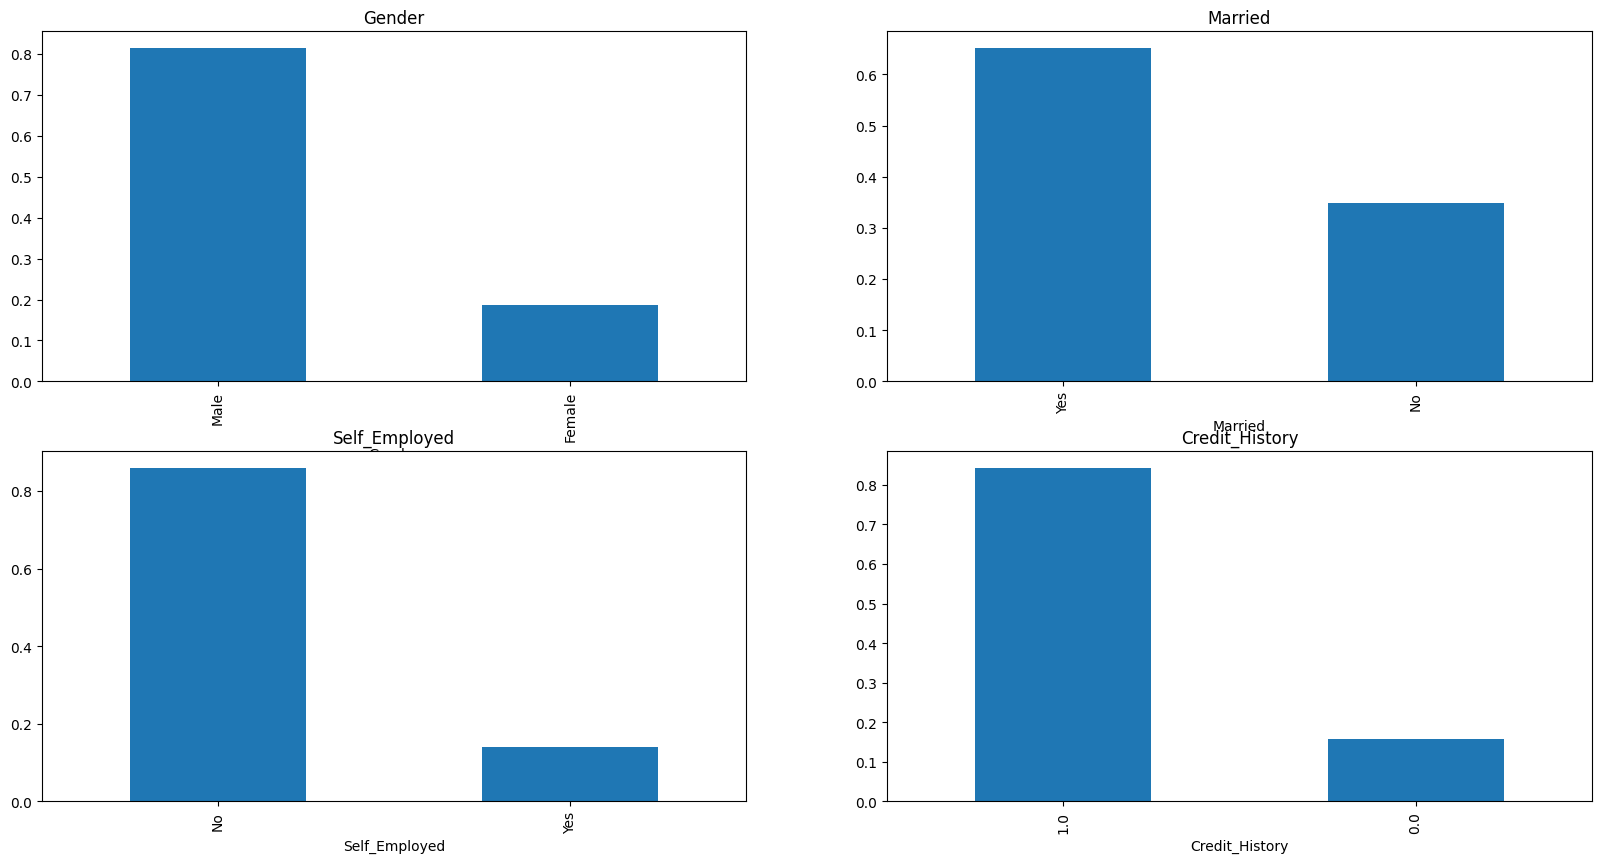

In [11]:
plt.figure(1)
plt.subplot(2,2,1)
loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(2,2,2)
loan['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(2,2,3)
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(2,2,4)
loan['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

Here are observations from the above plots:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

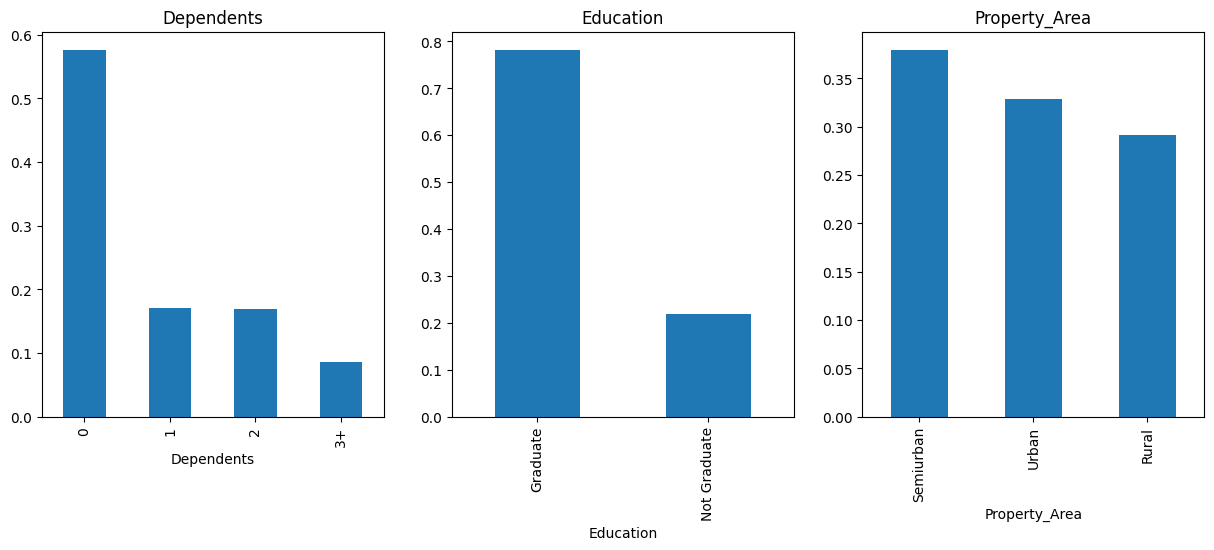

In [12]:
plt.figure(1)
plt.subplot(131)
loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Dependents')
plt.subplot(132)
loan['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
loan['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

* There are almost 60% applicants who have no one dependent on them.
* Graduates are around 80% in the data.
* Property of the applicants is quite evenly spread in semiurban, urban and rural areas.

#### Independent Variable (Continous)

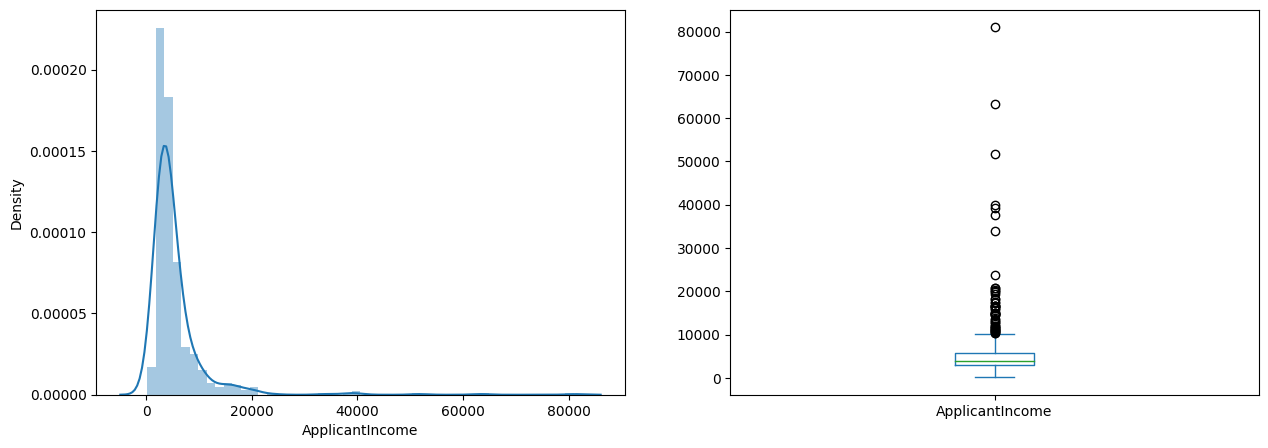

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['ApplicantIncome'])
plt.subplot(122)
loan['ApplicantIncome'].plot.box(figsize =(15,5))
plt.show()

Column - 'ApplicantIncome' has outlier

Text(0.5, 1.0, 'Applicant Income')

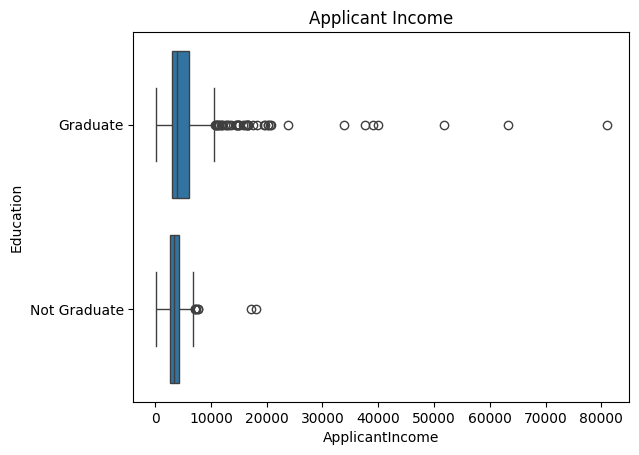

In [14]:
sns.boxplot(x='ApplicantIncome',y='Education',data=loan)
plt.title('Applicant Income')

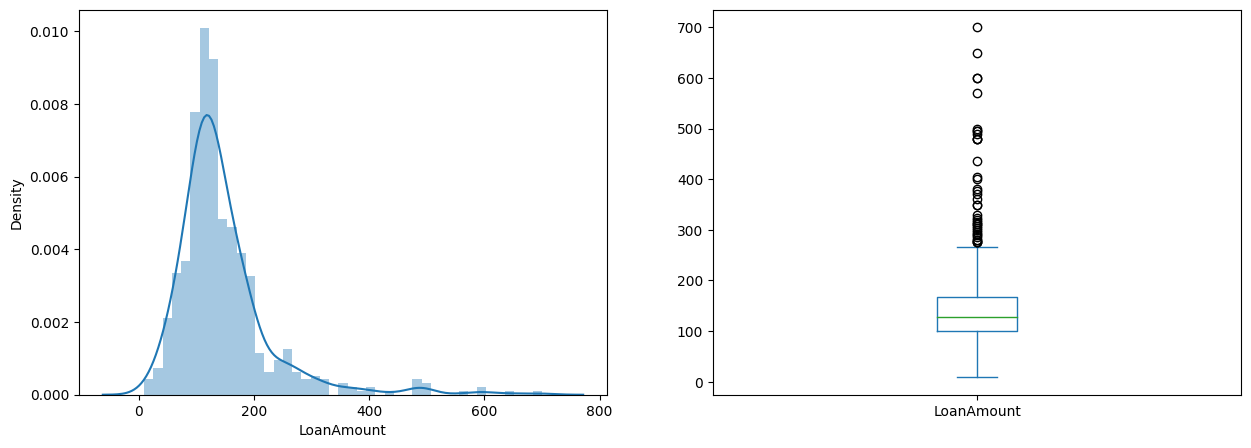

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['LoanAmount'])
plt.subplot(122)
loan['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

Lets recall some of the hypotheses that we generated earlier:

* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### Categorical Independent Variable vs Target Variable

<Axes: xlabel='None'>

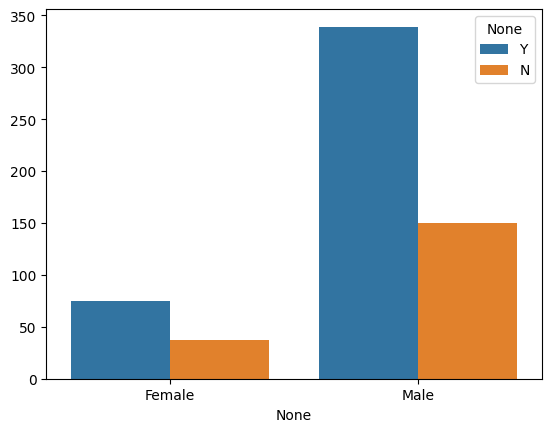

In [16]:
a=loan.groupby('Gender')['Loan_Status'].value_counts()#.plot(kind='bar',title= 'Gender')
sns.barplot(x = a.index.map(lambda x:x[0]), y = a.values, hue = a.index.map(lambda x:x[1]))

<Figure size 640x480 with 0 Axes>

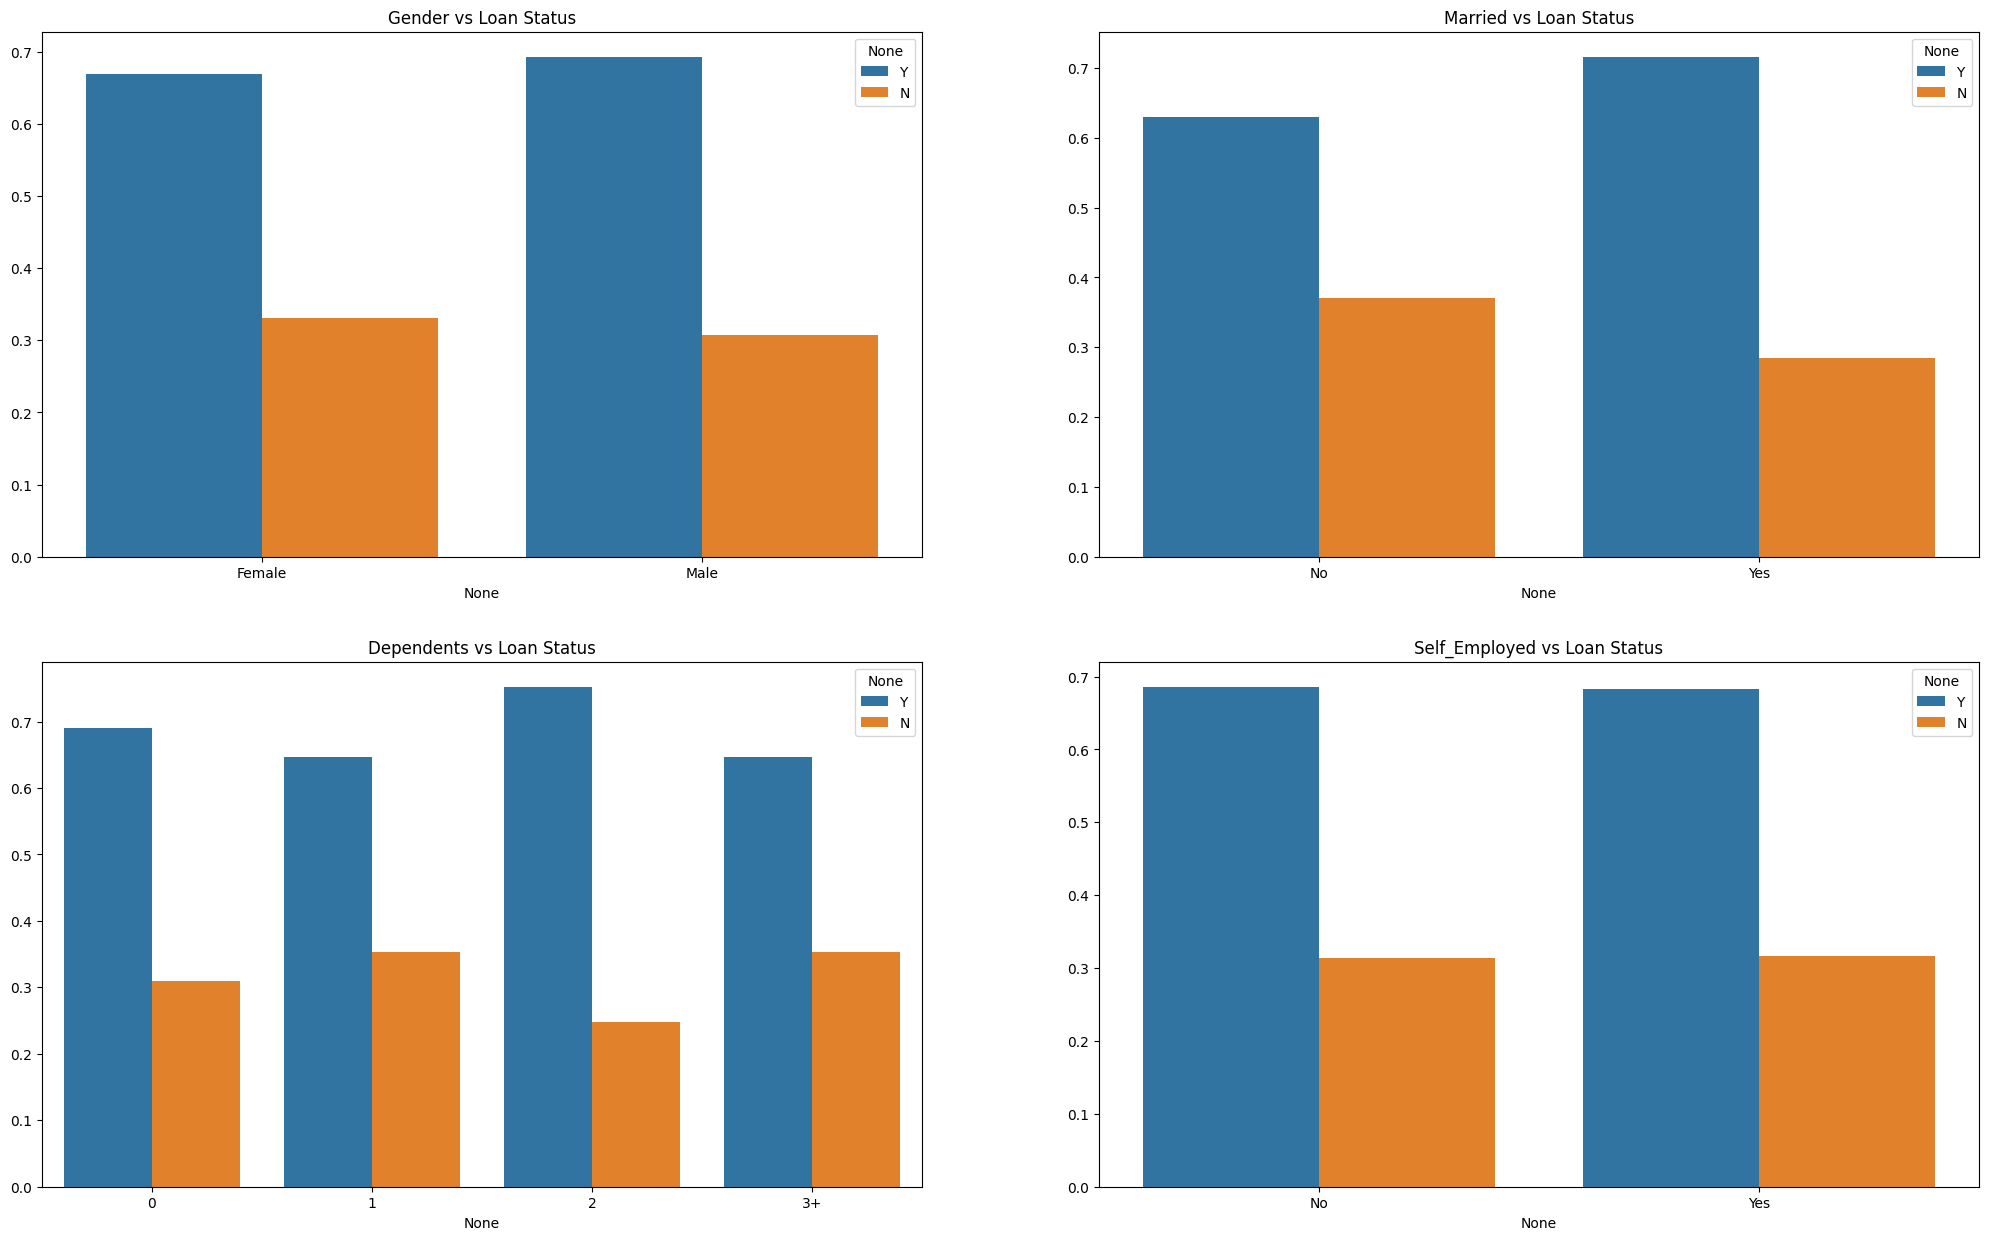

In [17]:
plt.figure(1)
plt.figure(figsize=(25,15))

plt.subplot(221)
a = loan.groupby('Gender')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = a.index.map(lambda x:x[0]), y = a.values, hue = a.index.map(lambda x:x[1]))
plt.title('Gender vs Loan Status')

plt.subplot(2,2,2)
b = loan.groupby('Married')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = b.index.map(lambda x:x[0]), y = b.values, hue = b.index.map(lambda x:x[1]))
plt.title('Married vs Loan Status')

plt.subplot(2,2,3)
c = loan.groupby('Dependents')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = c.index.map(lambda x:x[0]), y = c.values, hue = c.index.map(lambda x:x[1]))
plt.title('Dependents vs Loan Status')

plt.subplot(2,2,4)
d = loan.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = d.index.map(lambda x:x[0]), y = d.values, hue = d.index.map(lambda x:x[1]),hue_order=['Y','N'])
plt.title('Self_Employed vs Loan Status')

plt.show()

* We can see that the proportion of male and female applicants is almost same for both approved and unapproved loans.
* Proportion of married applicants is slightly higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is quite similarity for loan approval status in Self_Employed plot.

Text(0.5, 1.0, 'Property_Area vs Loan Status')

<Figure size 640x480 with 0 Axes>

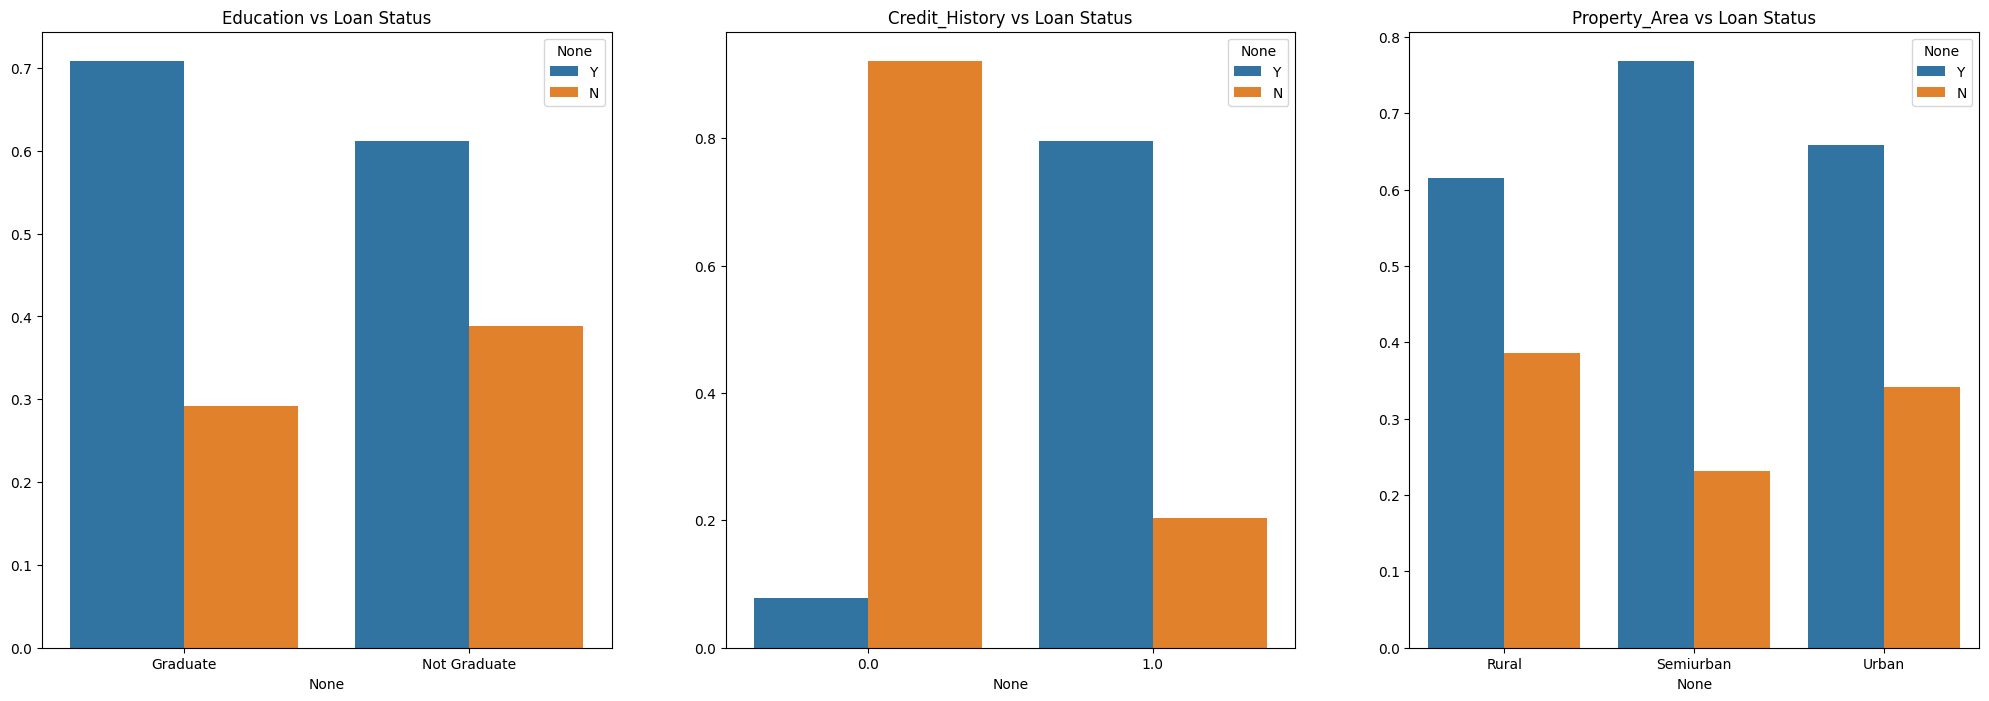

In [18]:
plt.figure(1)
plt.figure(figsize=(25,8))

plt.subplot(131)
a = loan.groupby('Education')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = a.index.map(lambda x:x[0]), y = a.values, hue = a.index.map(lambda x:x[1]))
plt.title('Education vs Loan Status')

plt.subplot(132)
b = loan.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = b.index.map(lambda x:x[0]), y = b.values, hue = b.index.map(lambda x:x[1]),hue_order=['Y','N'])
plt.title('Credit_History vs Loan Status')

plt.subplot(133)
c = loan.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True)
sns.barplot(x = c.index.map(lambda x:x[0]), y = c.values, hue = c.index.map(lambda x:x[1]))
plt.title('Property_Area vs Loan Status')

* Graduates have slightly high chances of getting loan.
* Applicants with no credit history have very low chance of loan approval.
* There is not much difference for loan approval on property area.

### Numerical Independent Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

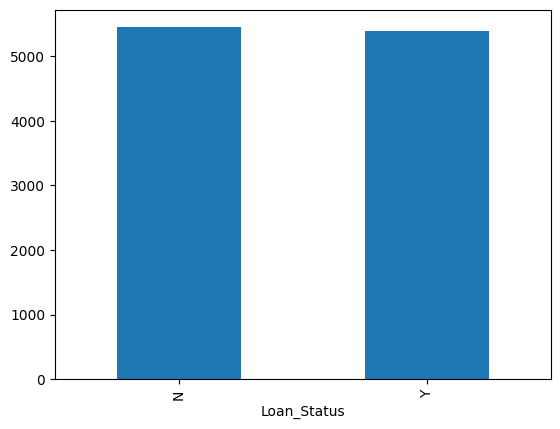

In [19]:
loan.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<Axes: ylabel='Density'>

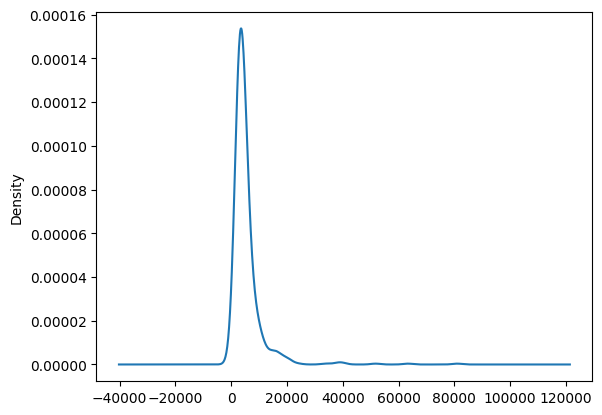

In [20]:
loan['ApplicantIncome'].plot.kde()

Correlation between all the numerical variables.

<Axes: >

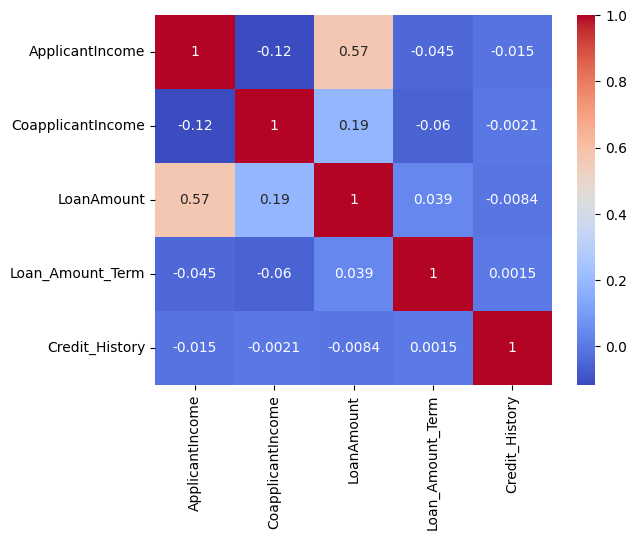

In [21]:
#sns.heatmap(loan.corr())
# Select only numeric columns
numeric_loan = loan.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_loan.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### Filling Missing Values In Columns

In [22]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Column 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and  'Credit_History'.

Taking Mode of categorical values and filling in Nan values.

In [23]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace =True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

we are done with categorical variables.

Now filling numerical variables with mean or median.

In [24]:
loan['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [25]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

In [26]:
avg = loan.groupby('Self_Employed')['LoanAmount'].mean()
for i,j in zip(avg.index,avg.values):
    loan.loc[loan['Self_Employed']==i,'LoanAmount']= loan.loc[loan['Self_Employed']==i,'LoanAmount'].fillna(j)

In [27]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# ML Models

### SVM Model

In [28]:
loan_1 = loan.copy()
for col in loan.columns:
    lb = LabelEncoder()
    loan_1[col] = lb.fit_transform(loan[col].values)

loan_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,96,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [29]:
X = loan_1.drop('Loan_Status', axis=1)
y = loan_1['Loan_Status']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
svm = SVC(kernel = 'rbf', C =2000)
svm.fit(X_train, y_train)

SVC(C=2000)

In [32]:
svm.score(X_train,y_train)

0.782608695652174

In [33]:
svm.score(X_test,y_test)

0.6493506493506493

### KNN Model

In [34]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [35]:
knn.score(X_train, y_train)

0.7891304347826087

In [36]:
knn.score(X_test,y_test)

0.6103896103896104

### Naive Bayes

In [37]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
nb.score(X_train, y_train)

0.8065217391304348

In [39]:
nb.score(X_test,y_test)

0.8116883116883117

### Decision Tree

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dt.score(X_train, y_train)

1.0

In [42]:
dt.score(X_test, y_test)

0.7792207792207793

### Grid Search CV

In [43]:
param_grid = {"max_depth": [3, 4, 7],
              "max_features": [7, 9, 12],
              "min_samples_split": [4, 7, 9],
              "criterion": ["gini", "entropy"]}

In [44]:
gs = GridSearchCV(dt, param_grid=param_grid, cv=10)
gs.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 7], 'max_features': [7, 9, 12],
                         'min_samples_split': [4, 7, 9]})

In [45]:
gs.best_score_

0.8046800634584874

In [46]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_split=4)

In [47]:
gs.score(X_train, y_train)

0.8304347826086956

In [48]:
gs.score(X_test, y_test)

0.8181818181818182

### Random Forest

In [49]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
rfc.score(X_train, y_train)

1.0

In [51]:
rfc.score(X_test, y_test)

0.8051948051948052

In [52]:
rfc.feature_importances_
feature_importance = pd.DataFrame({'importance': rfc.feature_importances_}, index= X.columns).sort_values('importance')
feature_importance

,importance
Self_Employed,0.014180
Gender,0.016024
Education,0.017320
Married,0.023991
Dependents,0.038586
Loan_Amount_Term,0.039769
Property_Area,0.047881
CoapplicantIncome,0.092164
LoanAmount,0.142108
ApplicantIncome,0.156272


In [53]:
new_feature = feature_importance[feature_importance.importance > 0.03]
x = X.copy()
x.drop(new_feature.index,inplace=True,axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [55]:
new_rfc = RandomForestClassifier(n_estimators=150)
new_rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [56]:
new_rfc.score(x_train, y_train)

0.7021739130434783

In [57]:
new_rfc.score(x_test, y_test)

0.6493506493506493

### AdaBoost

In [58]:
ada = AdaBoostClassifier()
ada.fit(x, y)

AdaBoostClassifier()

In [59]:
ada.score(x_train, y_train)

0.7

In [60]:
ada.score(x_test, y_test)

0.6493506493506493

### Gradient

In [61]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [62]:
gbc.score(x_train, y_train)

0.7

In [63]:
gbc.score(x_test, y_test)

0.6493506493506493

### XG Boost

In [64]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
xgb.score(x_train, y_train)

0.7021739130434783

In [66]:
xgb.score(x_test, y_test)

0.6493506493506493

## Test Case

**Reading our test data**

In [67]:
test = pd.read_csv('madhante.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [68]:
test.shape

(367, 12)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Droping Nan values from our test dataset.

In [70]:
test.dropna(inplace=True)

In [71]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [72]:
test.shape

(289, 12)

Giving our model test case

In [73]:
X_test=test

In [74]:
X_test1 = X_test.copy()
for col in X_test1.columns:
    lb1 = LabelEncoder()
    X_test1[col] = lb1.fit_transform(X_test1[col].values)

X_test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,206,0,46,9,1,2
1,1,1,1,1,0,0,82,36,61,9,1,2
2,2,1,1,2,0,0,187,56,110,9,1,2
4,3,1,0,0,1,0,95,0,22,9,1,2
5,4,1,1,0,1,1,21,118,84,9,1,2


In [75]:
pred = knn.predict(X_test1)
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1])

Here is the output predicted by our model.

In [76]:
test['Loan_Status'] = pred

In [77]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0


<Axes: xlabel='Loan_Status', ylabel='count'>

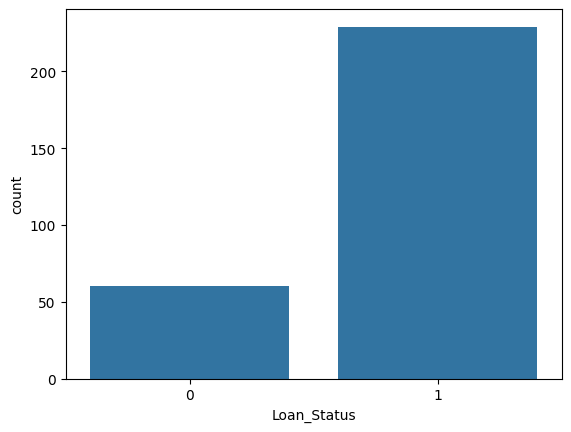

In [78]:
sns.countplot(x=test['Loan_Status'])

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

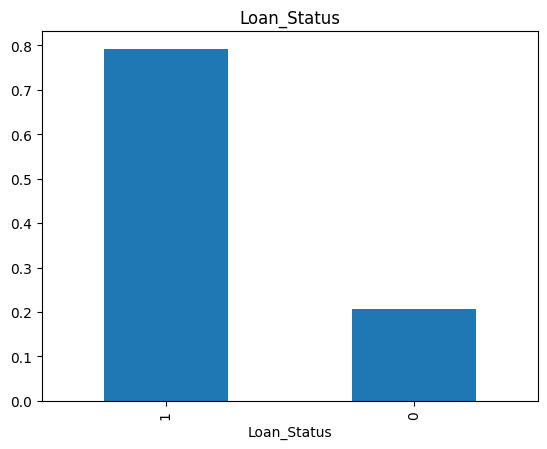

In [79]:
test['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan_Status')